In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import timeit

In [7]:
def two_dimensional_randomwalk():
    T = [500,550,600,650,700,750,800,850,900,950,1000] #Time
    p = 0.5
    q = 1 - p
    x = []
    y = []
    run = 10000
    for t in T:
        for i in range(run):
            x_walked = 0
            y_walked = 0
            for j in range(t):
                horizontal = np.random.rand() #walking left or right
                if horizontal < p: 
                    x_walked = x_walked + 1
                else:
                    x_walked = x_walked - 1
                vertical = np.random.rand() #walking up or down
                if vertical < p:
                    y_walked = y_walked + 1
                else:
                    y_walked = y_walked - 1
            x.append(x_walked)
            y.append(y_walked)
    return x,y    

In [8]:
start=timeit.default_timer()
x,y= two_dimensional_randomwalk()
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 165.56144089999998


In [9]:
T = [500,550,600,650,700,750,800,850,900,950,1000]
x_var = []
y_var = []
r = [] #for mean r^2
for i in range(11):
    x_var.append(np.var(x[i*10000:(i+1)*10000]))
    y_var.append(np.var(y[i*10000:(i+1)*10000]))
for i in range(11):
    r.append(x_var[i]+y_var[i])

nu is 0.49137513157257373


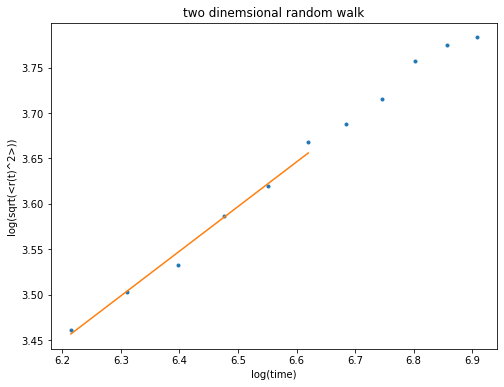

In [20]:
#plot log(sqrt(<r(t)^2>)) vs log(t)
fig = plt.figure(figsize=(8,6))
a=np.log(np.array(T))
b=np.log(np.array(np.sqrt(r)))
plt.plot(a,b,'.')
plt.title('two dinemsional random walk')
plt.xlabel('log(time)')
plt.ylabel('log(sqrt(<r(t)^2>))')
z=np.polyfit(a,b,1)
print('nu is',z[0])
plt.plot([a[0],a[5]],[a[0]*z[0]+z[1],a[5]*z[0]+z[1]])

gradiant is: 1.9535305443054556


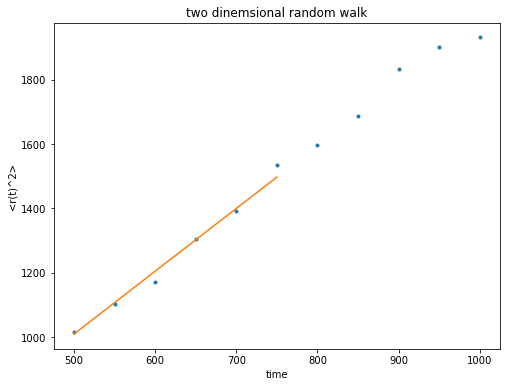

In [22]:
#plot <r(t)^2> vs t
fig = plt.figure(figsize=(8,6))
plt.plot(T,r,'.')
plt.title('two dinemsional random walk')
plt.xlabel('time')
plt.ylabel('<r(t)^2>')
z=np.polyfit(T,r,1)
print('gradiant is:',z[0])
plt.plot([T[0],T[5]],[T[0]*z[0]+z[1],T[5]*z[0]+z[1]])